In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imaginglss

In [3]:
decals = imaginglss.DECALS('/project/projectdirs/m779/imaginglss/dr2.conf.py')

In [4]:
dr = decals.datarelease

Matching 
http://legacysurvey.org/viewer/?ra=244.6758&dec=7.3071&zoom=13&layer=decals-dr2

In [5]:
from imaginglss.analysis import completeness
from imaginglss.analysis import targetselection

In [6]:
from imaginglss.utils.npyquery import Column as C

In [7]:
b = dr.brickindex.get_brick(dr.brickindex.search_by_name('2445p072'))

In [9]:
tractor = dr.catalogue.open(b)
sigma = {'r':5, 'z':5, 'g':5}
LRG = completeness.LRG(sigma)(targetselection.LRG(tractor))
QSO = completeness.QSO(sigma)(targetselection.QSO(tractor))

imaginglss/utils/npyquery.py:322: RuntimeWarning: invalid value encountered in power
  r = self.function(*ops)
imaginglss/utils/npyquery.py:322: RuntimeWarning: invalid value encountered in greater
  r = self.function(*ops)


<matplotlib.colorbar.Colorbar instance at 0x7fbe3ab41e60>

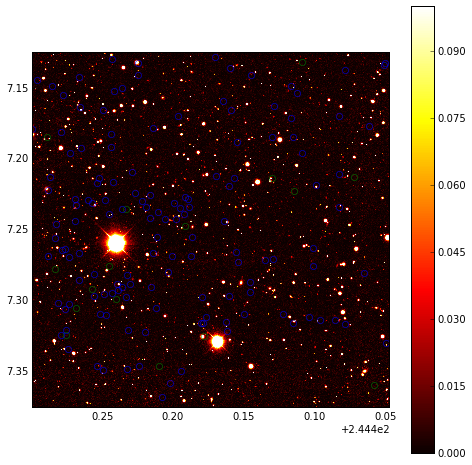

In [12]:
figure(figsize=(8, 8))
rimg = dr.images['image']['r']
plot(LRG['RA'], LRG['DEC'], 'o', mfc='none', mec='green')
plot(QSO['RA'], QSO['DEC'], 'o', mfc='none', mec='blue')
imshow(rimg.open(b).clip(0, 0.1), 
       cmap=cm.hot,  
       extent=(b.ra2, b.ra1, b.dec2, b.dec1))
colorbar()